<a href="https://colab.research.google.com/github/dhgrassi/Grupo-de-Estudos-DS/blob/main/Estacionariedade%2C_tend%C3%AAncia_e_sazonalidade_Insumo_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARIES IMPORT, SKTIME AND STATSMODELS INSTALLING AND DATASET IMPORT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install statsmodels  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 34.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#Dataset import
from google.colab import files
uploaded = files.upload()

Saving Insumo 6 - FH 15d.xlsx to Insumo 6 - FH 15d (1).xlsx


BASICS OF THE TIME SERIES

In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Insumo 6 - FH 15d.xlsx']))
df

,Data,Nível Insumo 6 (%)
0,2020-01-01,32.936077
1,2020-01-16,66.345352
2,2020-01-31,55.313564
3,2020-02-15,51.769299
4,2020-03-01,48.336342
...,...,...
58,2022-05-20,27.503260
59,2022-06-04,35.460827
60,2022-06-19,47.314720
61,2022-07-04,39.901764


In [ ]:
#Setting date as the index
df.set_index('Data', inplace=True, drop=True)

In [ ]:
#Checking if data is the index
df.head()

,Nível Insumo 6 (%)
Data,
2020-01-01,32.936077
2020-01-08,52.147076
2020-01-15,66.303055
2020-01-22,60.950333
2020-01-29,58.446655


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 2020-01-01 to 2022-05-29
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nível Insumo 6 (%)  294 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


PRE-PROCESSING

In [ ]:
#Nível Insumo 6 column has non numeric values
#list of non real values
nans = df[~df.applymap(np.isreal).all(1)]
nans

,Nível Insumo 6 (%)
Data,


In [ ]:
#transforming strings in Nan
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
#filling Nan values with previous valid number
#df.fillna(method="ffill", inplace="true")
df = df.fillna(df.mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 2020-01-01 to 2022-05-29
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nível Insumo 6 (%)  294 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


In [ ]:
import matplotlib

Text(0.5, 1.0, 'Insumo 6')

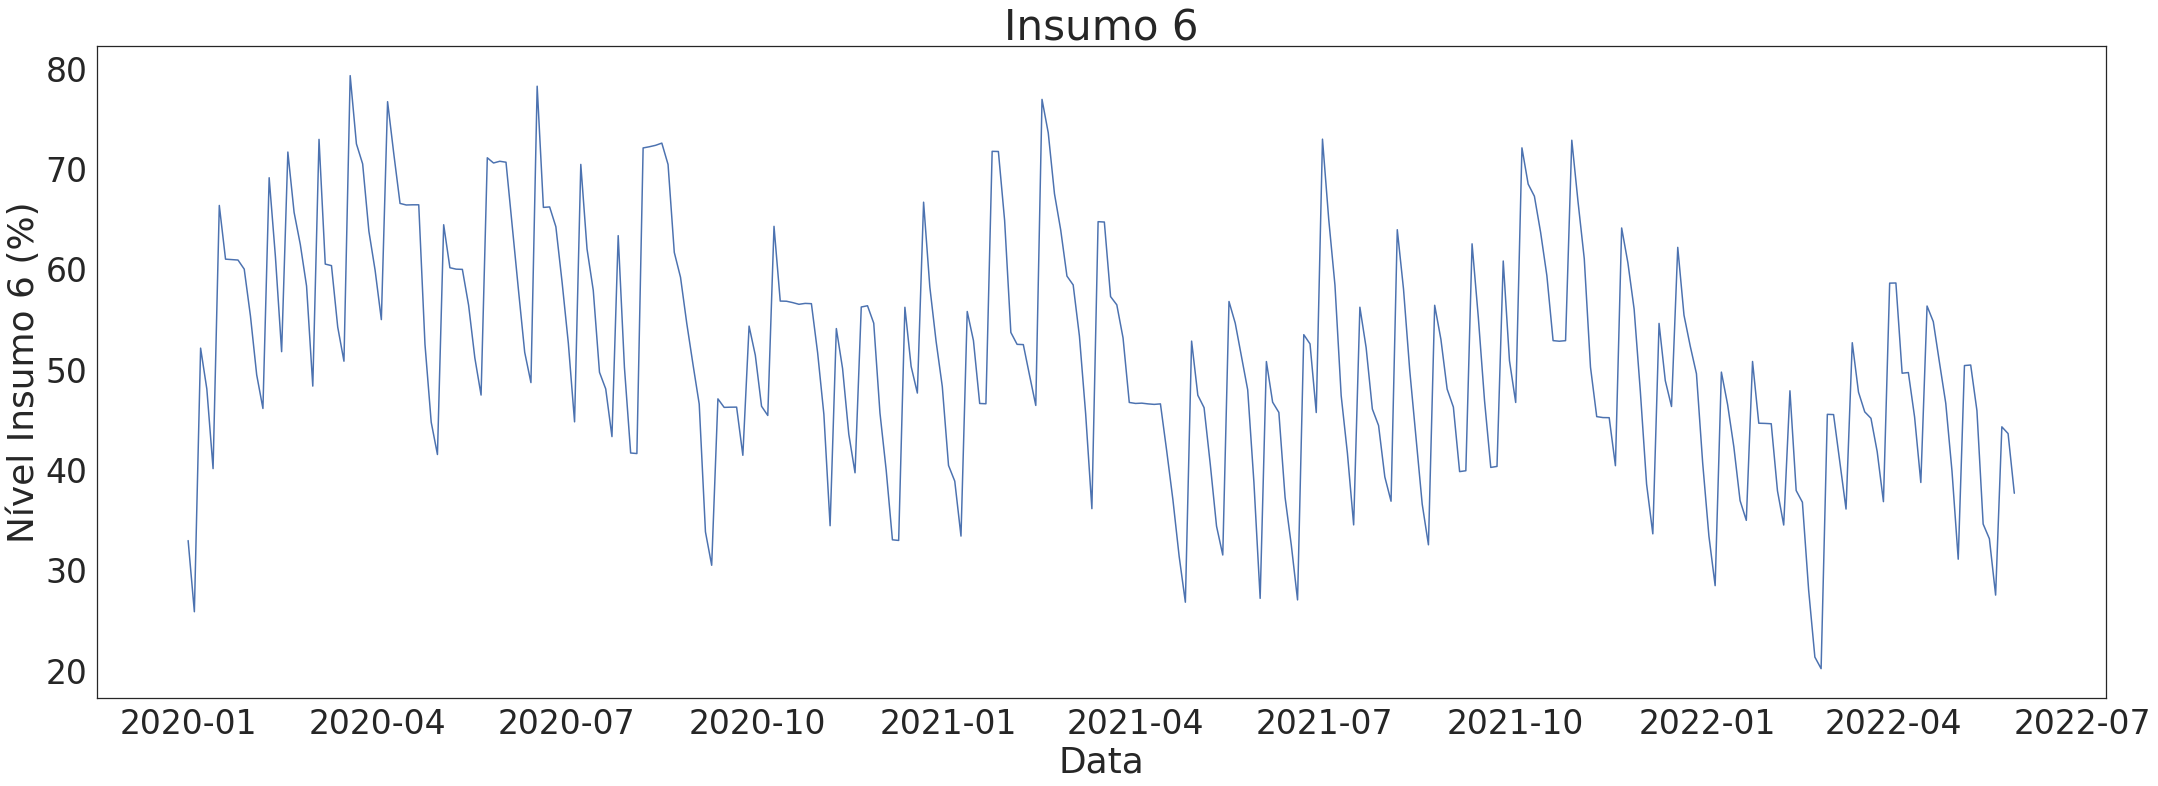

In [ ]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(36, 12)

# Setting the font scale
sns.set(font_scale=3)
sns.set_style("white")
sns.lineplot(x='Data', 
                y='Nível Insumo 6 (%)', 
                data=df)
plt.title("Insumo 6", fontsize=42)
#plt.savefig("Time Series - Insumo 6.png", dpi=300)

Text(0.5, 1.0, 'Insumo 6')

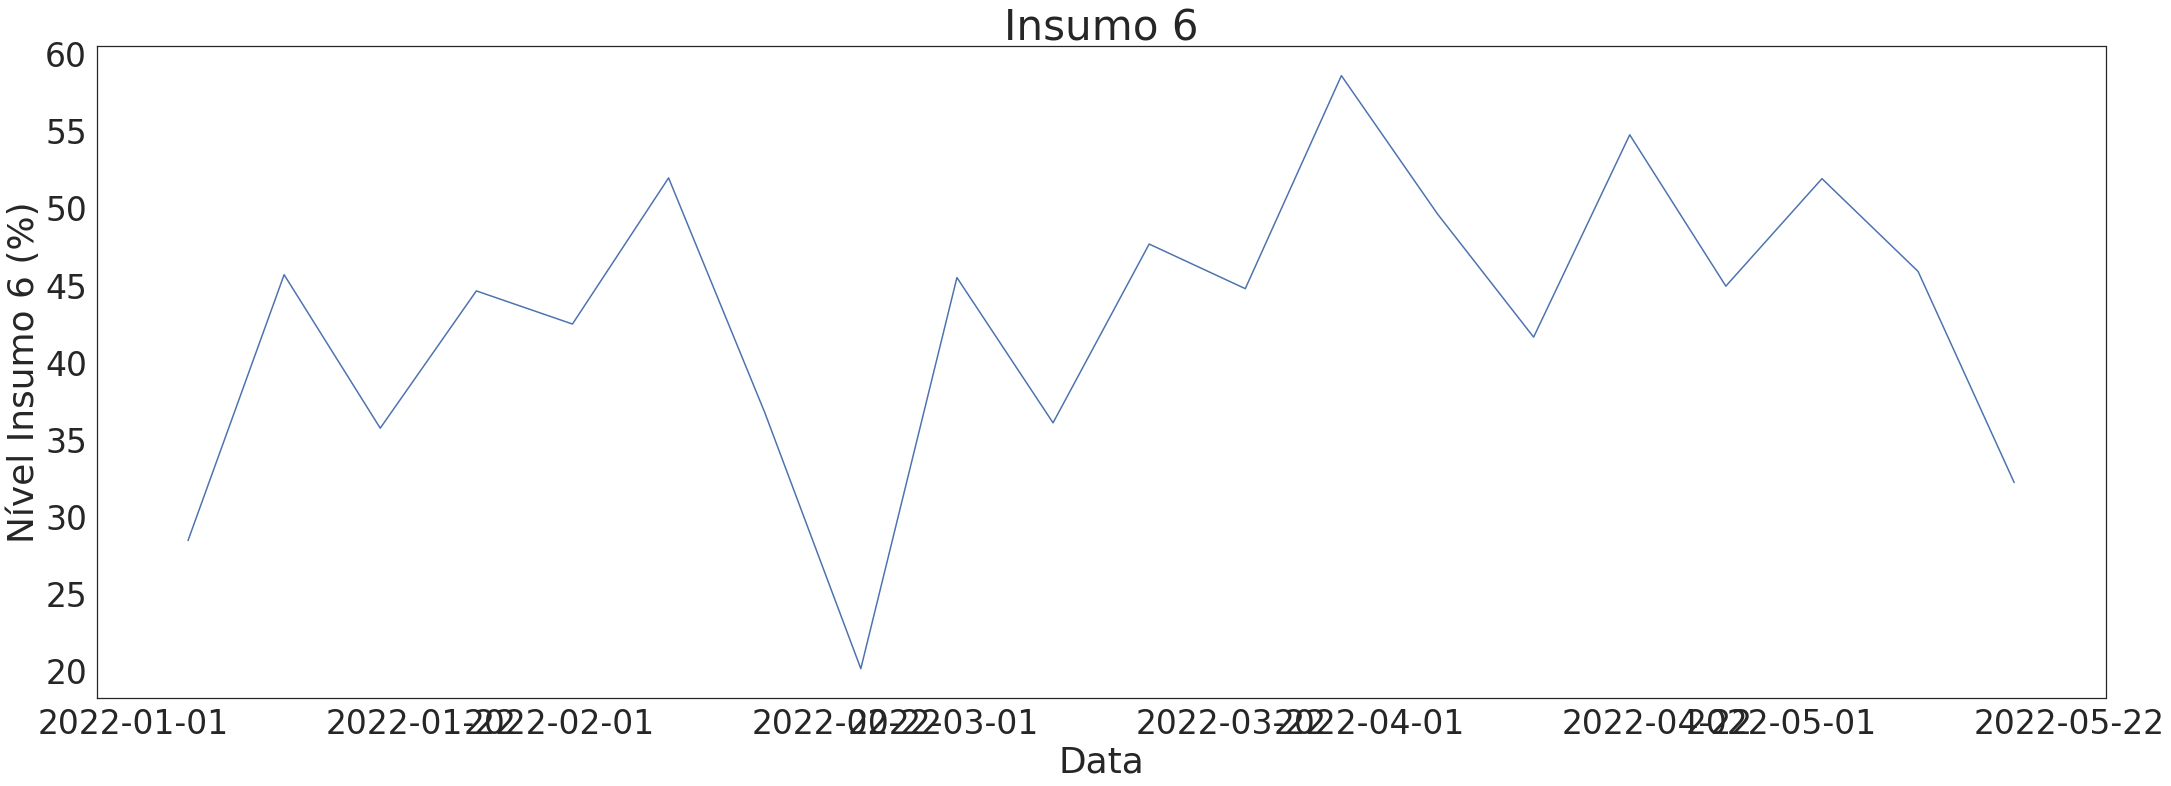

In [ ]:
df_zoom = df.loc[(df.index >= "2022-01-01 00:00") & (df.index <= "2022-05-31 21:00")]

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(36, 12)

# Setting the font scale
sns.set(font_scale=3)
sns.set_style("white")
sns.lineplot(x='Data', 
                y='Nível Insumo 6 (%)', 
                data=df_zoom)
plt.title("Insumo 6", fontsize=42)
#plt.savefig("Zoomed Time Series - Insumo 6.png", dpi=300)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma')

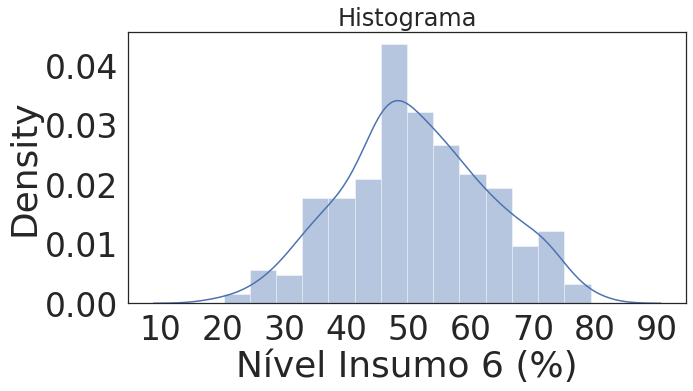

In [ ]:
fig, axis = plt.subplots(figsize =(10, 5))
sns.set(font_scale=1)
sns.set_style("white")
sns.distplot( a=df["Nível Insumo 6 (%)"], hist=True)
plt.title("Histograma", fontsize=24)
#plt.savefig("Histograma - Insumo 6.png", dpi=300)

SEASONAL DECOMPOSITION

In [ ]:
#First we need to ensure DF frequency is D
df = df.resample('15D').mean()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='add')

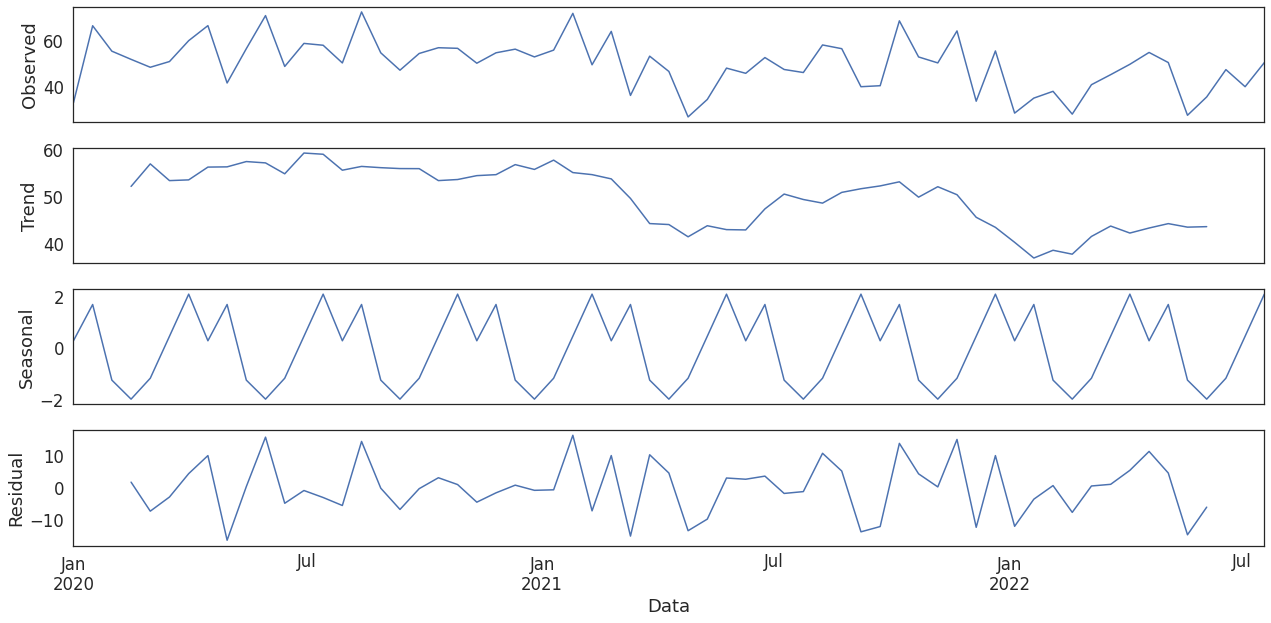

In [ ]:
#Plotting decomposition
from pylab import rcParams
rcParams['figure.figsize'] = 18,9
sns.set(font_scale=1.5)
sns.set_style("white")
result.plot()
#plt.savefig("Decomposição_Sazonal_Insumo_6.png", dpi=300)
plt.show()

CHECKING DATA STATIONARITY

In [ ]:
from typing_extensions import Literal

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
X = df.iloc[:,0].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.678453
p-value: 0.077842


In [ ]:
sm.tsa.stattools.kpss(df, regression='ct')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  else:


(0.053382222580954375,
 0.1,
 16,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

ACF AND PACF PLOTS

In [ ]:
sm.tsa.acf(df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  Returns


array([ 1.00000000e+00,  1.86728042e-01,  2.09816723e-01,  2.87885133e-01,
        6.47528937e-02,  1.68763427e-01,  4.93851193e-02, -7.01048120e-02,
        1.91453775e-01,  1.94814892e-01,  1.84557303e-02,  7.46436044e-02,
        4.47529410e-02,  2.59909538e-02, -8.71884101e-04, -4.21219129e-02,
        6.97408248e-02,  1.26031402e-01,  1.32177611e-01,  1.09836814e-02,
        1.54736997e-01,  5.62194221e-02, -1.07782045e-01, -1.06411806e-01,
       -1.99716008e-02, -9.97217633e-03, -1.21839915e-01, -2.84467760e-02,
       -5.06676906e-02,  4.45623069e-02, -3.46877961e-02, -1.07263950e-01,
       -1.41341441e-01,  2.11332882e-02, -9.71151334e-02, -1.64789340e-01,
       -4.26490089e-02, -1.18527586e-01, -6.14591236e-02, -1.12537026e-01,
       -1.82570018e-01])

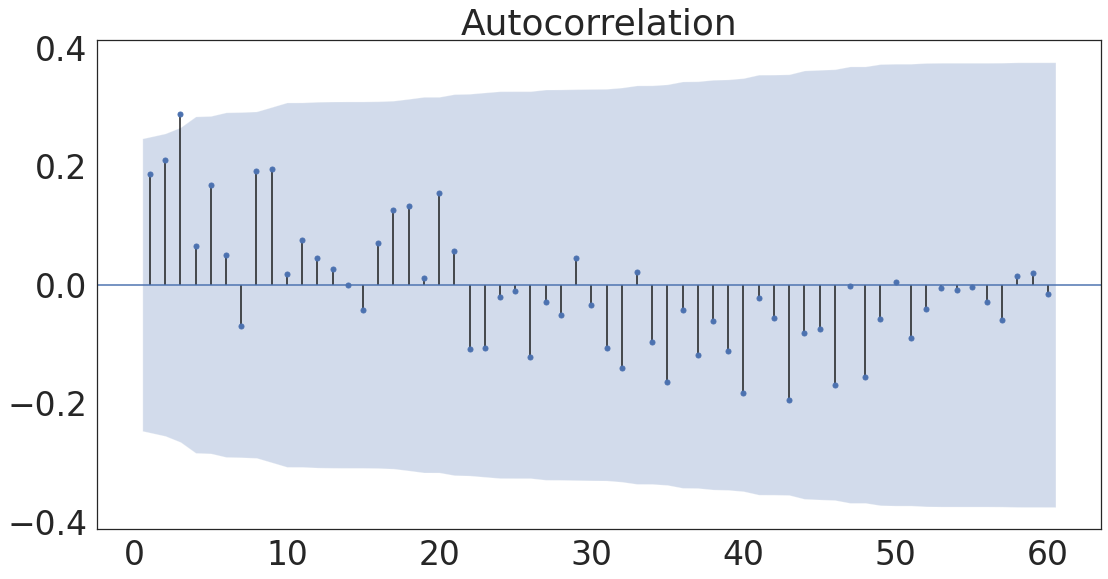

In [ ]:
rcParams['figure.figsize'] = 18,9
sns.set(font_scale=3)
sns.set_style("white")
fig = tsaplots.plot_acf(df, lags=60, zero=False)
#plt.savefig("ACF_Teste_Insumo_6_40_lags.png", dpi=300)
plt.show()

In [ ]:
sm.tsa.pacf(df)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  


array([ 1.        ,  0.18973978,  0.18744294,  0.25083088, -0.0494252 ,
        0.0939972 , -0.06380824, -0.14146774,  0.21023492,  0.26201543,
       -0.06653627, -0.10705031, -0.03508163, -0.02071498, -0.08263632,
        0.04728961,  0.21042779,  0.11965926,  0.09783239, -0.16006615,
        0.12533963, -0.08788858, -0.33071125, -0.25864371,  0.27973192,
        0.22111031, -0.52990084, -0.00910699,  0.41630566, -0.03272574,
       -0.88325539,  2.2126784 ,  0.18668394,  2.67936158,  0.43286291,
       -0.7964017 , -0.33312528,  0.07728213, -0.16906029, -0.45769293,
       -0.23618001])

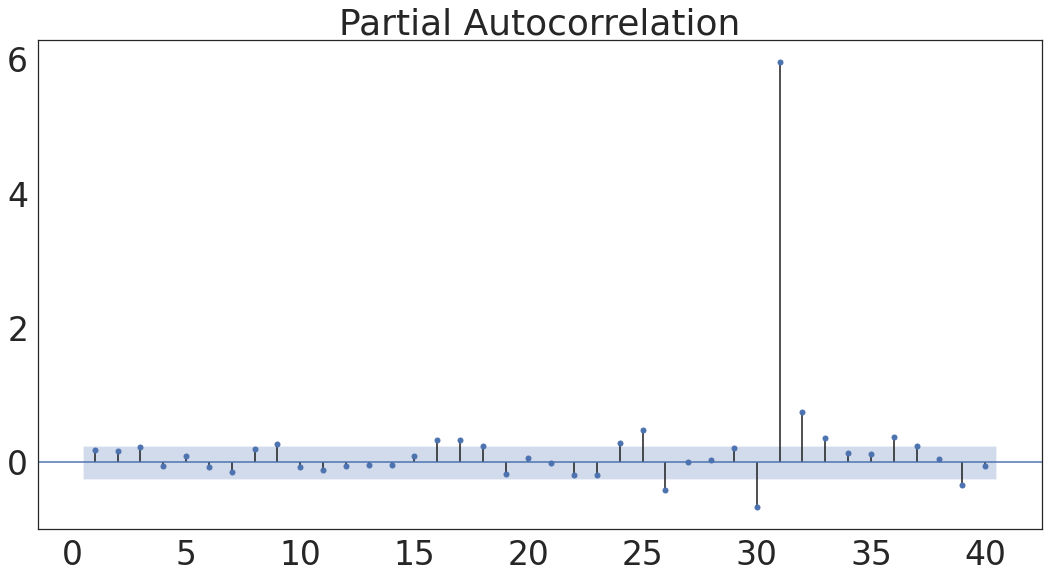

In [ ]:
rcParams['figure.figsize'] = 18,9
fig = tsaplots.plot_pacf(df, lags=40, zero=False, method=('ols'))
#plt.savefig("PACF_Teste_Insumo_6_40_lags.png", dpi=300)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Text(0.5, 1.0, 'Diff Insumo 6')

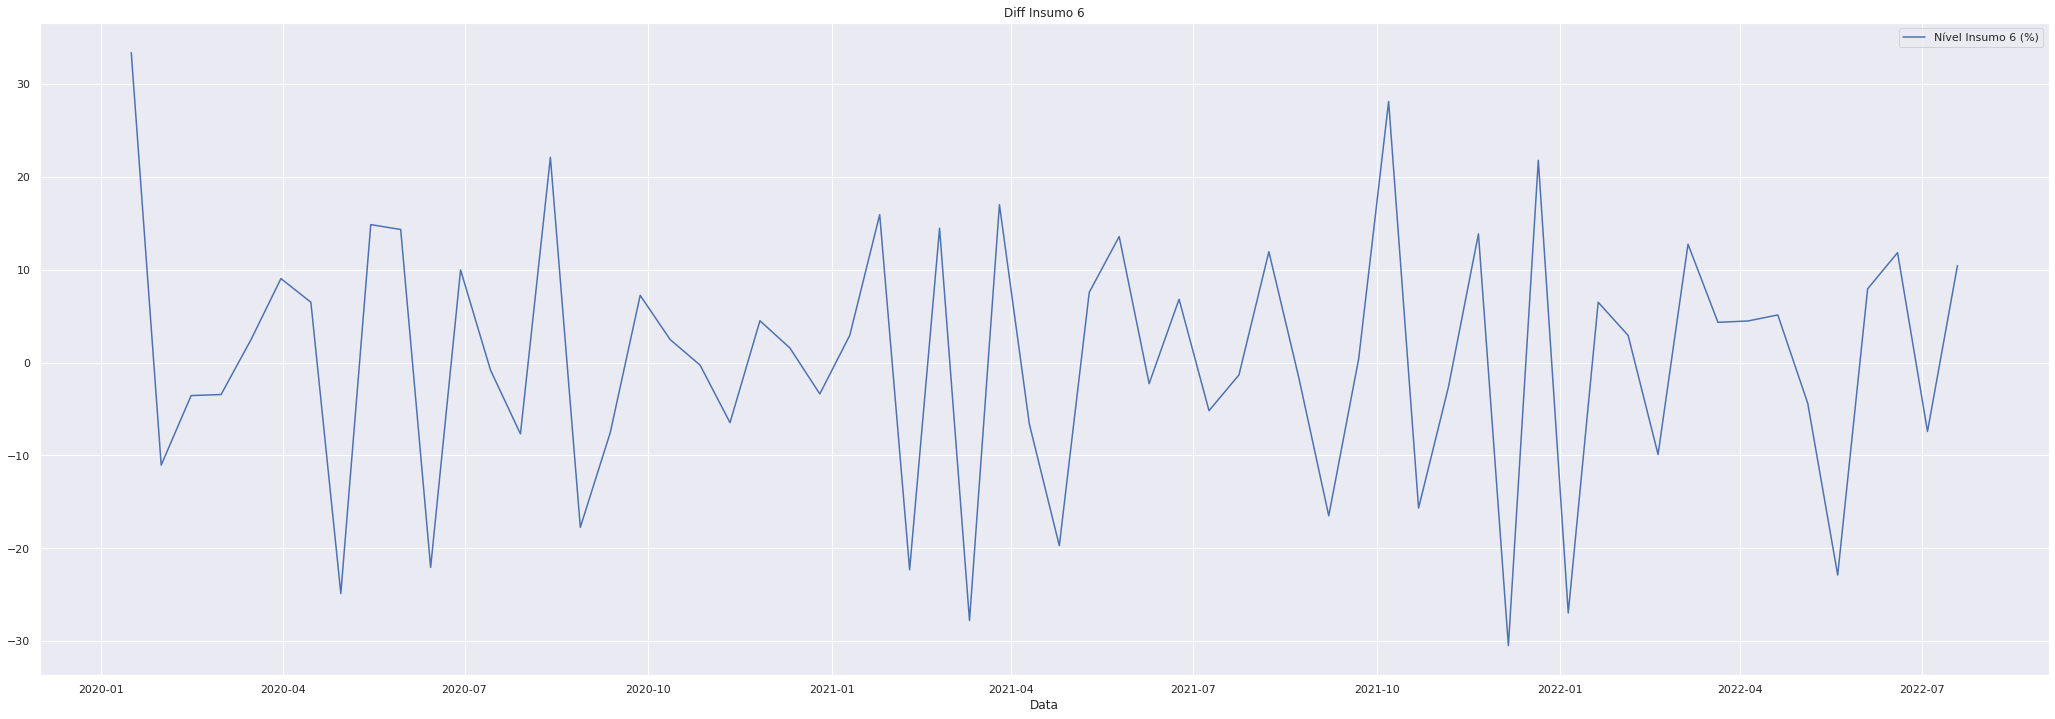

In [ ]:
#Differenting
from pandas import datetime

# Change seaborn plot size
fig.set_size_inches(36, 12)
 
diff = df.diff()

fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(36, 12)

# Setting the font scale
sns.set(font_scale=1)
sns.lineplot(data=diff)
plt.title("Diff Insumo 6", fontsize=12)


In [ ]:
diff = diff.dropna()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  Returns


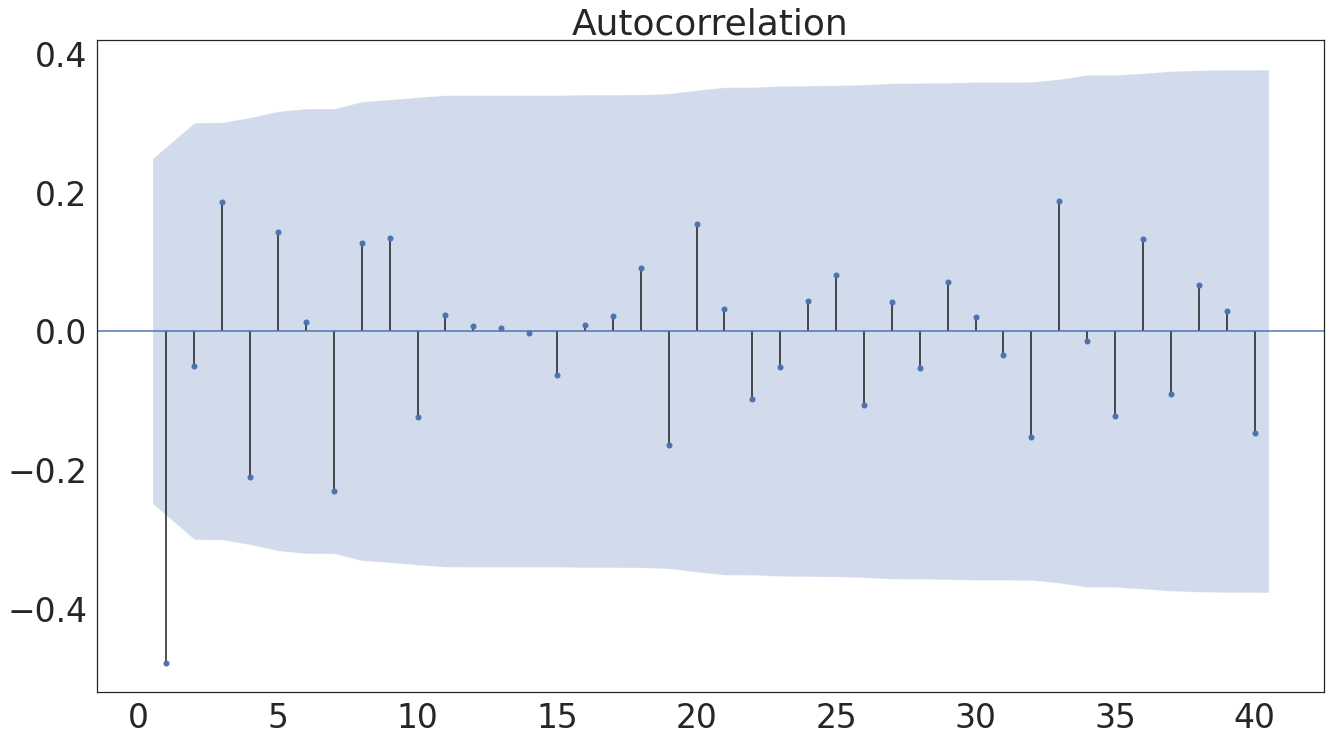

In [ ]:
sm.tsa.acf(diff)
rcParams['figure.figsize'] = 22,12
sns.set(font_scale=3)
sns.set_style("white")
fig = tsaplots.plot_acf(diff, lags=40, zero=False)
#plt.savefig("ACF_Teste_Insumo_6_40_lags.png", dpi=300)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  


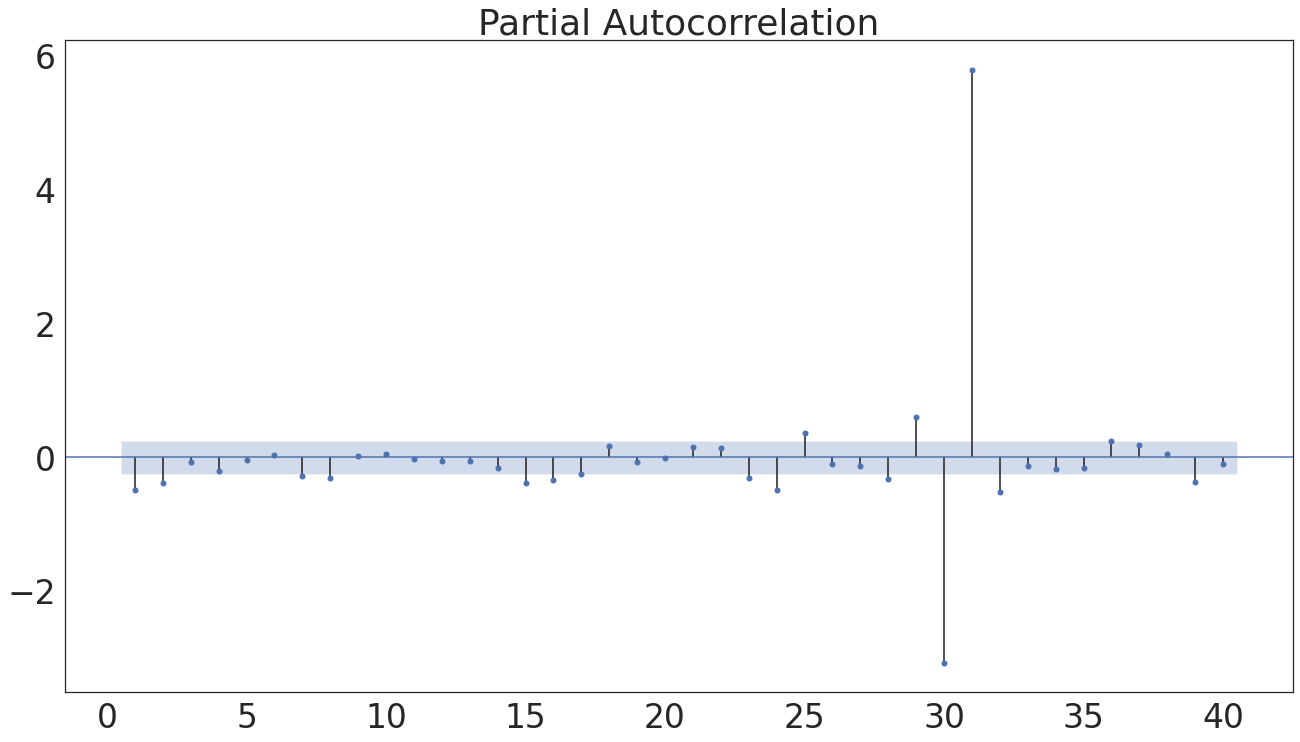

In [ ]:
sm.tsa.pacf(diff)
fig = tsaplots.plot_pacf(diff, lags=40, zero=False, method=('ols'))
#plt.savefig("PACF_Teste_Insumo_6_40_lags.png", dpi=300)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
X = diff.iloc[:,0].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.199389
p-value: 0.000000
